<a href="https://colab.research.google.com/gist/m5d5/34b974ef8b96863bd6285071df7444f8/epura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Epura
import matplotlib.pyplot as plt
import numpy as np

def interval(z1, z2):
    def decorator(func):
        func.interval = [z1, z2]
        return func
    return decorator

def Epura(*funcs, type='', width=15, height=5, fsize=8):

    def find_sign_change(lst):
        if len(lst) < 2:
            return None

        for i in range(1, len(lst) - 1):  # Игнорируем крайние элементы
            if lst[i-1] > 0 and lst[i] < 0:
                return -i 
            elif lst[i-1] < 0 and lst[i] > 0: # Если знак изменился с минуса на плюс
                return i 
        return None

    def add_elements(i, y, z, cY, cZ):
        y_i = y[i]
        if y_i not in cY or z[i] not in cZ:
            cY.append(y_i)
            cZ.append(z[i])        

    fig, ax = plt.subplots(figsize=(width, height)) 
    # Добавление основных осей
    # ax1 = fig.add_axes([0, 0, 2, 1])  # left, bottom, width, height
    # Добавление дополнительных осей
    # ax2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) 

    max_interval_value = max(max(func.interval) for func in funcs)
    ax.plot([0, max_interval_value], [0, 0], color='#ffe19c', linewidth=4)
    color_map = {'N': 'green', 'M': 'red', 'Q': 'blue'}
    name_map = {'N': 'N_z (z), кН', 'M': 'M_x (z), кн⋅м', 'Q': 'Q_y (z), кН'}
    clr = color_map[type] if type != '' else 'red'
    nm = name_map[type] if type != '' else ''

    cX = []
    cY = []
    cZ = []

    for func in funcs:
        z1, z2 = func.interval
        z = np.linspace(min(z1, z2), max(z1, z2), 100)

        if z1 > z2:
            y = func(z1 - z)
        elif z1 > 0:
            y = func(z - z1)
        else:
            y = func(z)
        if np.isscalar(y):
            y = np.full_like(z, y)           

        ax.plot(z, y, color=clr)
        ax.fill_between(z, y, color='none', edgecolor=clr, alpha=0.5, hatch='|')

        indices = [0, -1, np.argmin(y), np.argmax(y)]
        for i in indices:
            add_elements(i, y, z, cY, cZ)

        idx = find_sign_change(y)
        if idx is not None:
            cX.append((1 if idx > 0 else -1) * round(z[abs(idx)], 1))

    cY = [0 if (y := round(num, 1)) == -0. else y for num in cY]

    for y, z in zip(cY, cZ):
        if y >= 0:
            ax.text(z, y, f'{y}', fontsize=fsize, verticalalignment='bottom')
        else:
            ax.text(z, y, f'{y}', fontsize=fsize, verticalalignment='top')

    for z in cX:
        if z > 0:
            ax.text(z, 0, f'{z}', fontsize=fsize, verticalalignment='top')
        else:
            ax.text(abs(z), 0, f'{abs(z)}', fontsize=fsize, verticalalignment='bottom')

    # ax.axis('off')
    ax.set_xlabel('X')
    ax.grid(True, color='lightgrey')
    ax.set_xlabel(r'$z, м$')
    ax.set_ylabel(r'$'+nm+'$')
    # ax.title(r'$Эпюра\ ' + nm+'$')
    
    plt.tight_layout()
    plt.show()


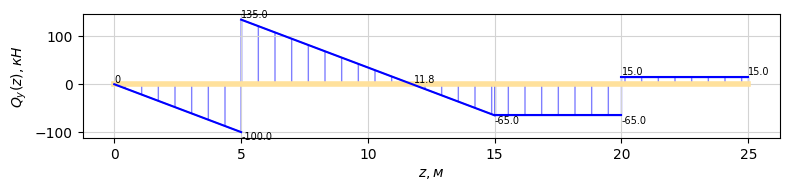

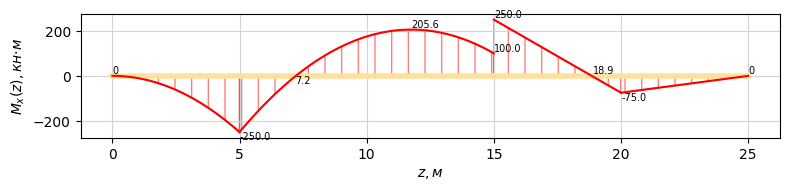

In [2]:
q = 20
a = 5
F = 80
Va = 235
Vb = 15

@interval(0, a)
def N1(z):
    return -q*z

@interval(a, 3*a)
def N2(z):
    return -q*(a+z) + Va

@interval(4*a, 3*a)
def N3(z):
    return -F+Vb

@interval(5*a, 4*a)
def N4(z):
    return Vb


@interval(0, a)
def M1(z):
    return -q*z**2/2

@interval(a, 3*a)
def M2(z):
    return -q*(a+z)**2/2 + Va*z

@interval(4*a, 3*a)
def M3(z):
    return F*z-Vb*(z+a)

@interval(5*a, 4*a)
def M4(z):
    return -Vb*z

# Построение графика
Epura(N1, N2, N3, N4, type='Q', width=8, height=2, fsize=7)
Epura(M1, M2, M3, M4, type='M', width=8, height=2, fsize=7)


⋅